In [1]:
import time
import itertools
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier, plot_importance
import numpy as np
from numpy import sort

# XGBoost

In [2]:
def xgboost(X_train, y_train, X_test, y_test):
    last_time = time.time()
    xgb = XGBClassifier(n_estimators=300, objective='multi:softmax', num_class=13, random_state=0)

    xgb.fit(X_train, y_train)
    middle_time = time.time()

    y_pred = xgb.predict(X_test)

    current_time = time.time()

    accuracy_score(y_test, y_pred)

    print("训练耗时： {}".format(middle_time - last_time))
    print("测试耗时： {}".format(current_time - middle_time))
    cm = confusion_matrix(y_test, y_pred)
    print('confusion matrix xgb:')
    print(cm)
    print('classification report xgb:')
    print(classification_report(y_test, y_pred))

    plot_confusion_matrix(cm, classes=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13'],
                          normalize=True, title='Normalized confusion matrix')

    plt.show()

In [3]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.4f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="red")
        # color="red" if cm[i, j] > thresh else "black")
    # plt.set_tight_layout(True)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plot_confusion_matrix(cm, classes=['0', '1', '2'], normalize=True, title='Normalized confusion matrix')
    plt.show()

# Combine all csv data

In [94]:
    # 显示所有列
    pd.set_option('display.max_columns', None)
    # 显示所有行
    pd.set_option('display.max_rows', None)
    # 设置value的显示长度为100，默认为50
    pd.set_option('max_colwidth', 100)

    # 读取csv
    # path = r'/home/itu/datadisk/dataset/csv-for-learning/'
    path = r'/Users/xiafei/Downloads/itu-dataset/csv-for-learning/'
    test_path = r'/Users/xiafei/Downloads/itu-dataset/csv-for-evaluation/'
    
    # all_n_files = glob.glob(path + "/*.n.csv")
    # all_v_files = glob.glob(path + "/*.v.csv")
    # all_p_files = glob.glob(path + "/*.p.csv")
    train_n_files = [path + x for x in
                   ['20200629.n.csv', '20200630.n.csv', '20200701.n.csv', '20200702.n.csv', '20200703.n.csv',
                    '20200704.n.csv', '20200705.n.csv', '20200706.n.csv']]
    train_v_files = [path + x for x in
                   ['20200629.v.csv', '20200630.v.csv', '20200701.v.csv', '20200702.v.csv', '20200703.v.csv',
                    '20200704.v.csv', '20200705.v.csv', '20200706.v.csv']]
    train_p_files = [path + x for x in
                   ['20200629.p.csv', '20200630.p.csv', '20200701.p.csv', '20200702.p.csv', '20200703.p.csv',
                    '20200704.p.csv', '20200705.p.csv', '20200706.p.csv']]
    
    
    test_n_files = [test_path + x for x in
                    ['20200707.n.csv', '20200708.n.csv', '20200709.n.csv', '20200710.n.csv', 
                     '20200711.n.csv', '20200712.n.csv', '20200713.n.csv']]
    test_v_files = [test_path + x for x in
                    ['20200707.v.csv', '20200708.v.csv', '20200709.v.csv', '20200710.v.csv',
                     '20200711.v.csv', '20200712.v.csv', '20200713.v.csv']]
    test_p_files = [test_path + x for x in
                    ['20200707.p.csv', '20200708.p.csv', '20200709.p.csv', '20200710.p.csv',
                     '20200711.p.csv', '20200712.p.csv', '20200713.p.csv']]
    

    li_n = []
    li_v = []
    li_p = []
    
    li_test_n = []
    li_test_v = []
    li_test_p = []

    # train
    for filename in train_n_files:
        print('read_csv network:', filename)
        df = pd.read_csv(filename, index_col=None, header=0)
        li_n.append(df)

    for filename in train_v_files:
        print('read_csv virtual:', filename)
        df = pd.read_csv(filename, index_col=None, header=0)
        li_v.append(df)

    for filename in train_p_files:
        print('read_csv physical:', filename)
        df = pd.read_csv(filename, index_col=None, header=0)
        li_p.append(df)
        
    # test
    for filename in test_n_files:
        print('read csv-for-evaluation network:', filename)
        df = pd.read_csv(filename, index_col=None, header=0)
        li_test_n.append(df)
    
    for filename in test_v_files:
        print('read csv-for-evaluation virtual:', filename)
        df = pd.read_csv(filename, index_col=None, header=0)
        li_test_v.append(df)
        
    for filename in test_p_files:
        print('read csv-for-evaluation physical:', filename)
        df = pd.read_csv(filename, index_col=None, header=0)
        li_test_p.append(df)

    dataset_n = pd.concat(li_n, axis=0, ignore_index=True, sort=False)
    dataset_v = pd.concat(li_v, axis=0, ignore_index=True, sort=False)
    dataset_p = pd.concat(li_p, axis=0, ignore_index=True, sort=False)
    
    test_n = pd.concat(li_test_n, axis=0, ignore_index=True, sort=False)
    test_v = pd.concat(li_test_v, axis=0, ignore_index=True, sort=False)
    test_p = pd.concat(li_test_p, axis=0, ignore_index=True, sort=False)

    print('dataset_n_v_p:')
    print(dataset_n.shape)
    print(dataset_v.shape)
    print(dataset_p.shape)
    print('testset_n_v_p:')
    print(test_n.shape)
    print(test_v.shape)
    print(test_p.shape)

    dataset_p.drop(['type', 'type_code'], axis=1, inplace=True)
    dataset_n.drop(['type', 'type_code'], axis=1, inplace=True)

    test_p.drop(['type', 'type_code'], axis=1, inplace=True)
    test_n.drop(['type', 'type_code'], axis=1, inplace=True)

    dataset_n.rename(columns=lambda x: 'n_' + x, inplace=True)
    dataset_v.rename(columns=lambda x: 'v_' + x, inplace=True)
    dataset_v['common_time_index'] = dataset_v['v_/time']
    dataset_p.rename(columns=lambda x: 'p_' + x, inplace=True)
    dataset_p['common_time_index'] = dataset_p['p_/time']

    test_n.rename(columns=lambda x: 'n_' + x, inplace=True)
    test_v.rename(columns=lambda x: 'v_' + x, inplace=True)
    test_v['common_time_index'] = test_v['v_/time']
    test_p.rename(columns=lambda x: 'p_' + x, inplace=True)
    test_p['common_time_index'] = test_p['p_/time']

    # dataset = pd.concat([dataset_n, dataset_v, dataset_p], axis=1, sort=False)
    dataset_pn = pd.merge(dataset_p, dataset_n, how='inner', left_index=True, right_index=True)
    dataset = pd.merge(dataset_pn, dataset_v, how='inner', on=['common_time_index'])

    # testset = pd.concat([test_n, test_v, test_p], axis=1, sort=False)
    testset_pn = pd.merge(test_p, test_n, how='inner', left_index=True, right_index=True)
    testset = pd.merge(testset_pn, test_v, how='inner', on=['common_time_index'])

    
    dataset.drop(['common_time_index'], axis=1, inplace=True)
    testset.drop(['common_time_index'], axis=1, inplace=True)
    dataset.dropna(axis=0, how='any', inplace=True)
    testset.dropna(axis=0, how='any', inplace=True)

    print('dataset:')
    print(dataset.shape)
    print('testset:')
    print(testset.shape)
    # 数据集概览
    # print(dataset.describe())
    # print(dataset.head(5))

    # valid
    # print('isnan', np.isnan(dataset.any()))
    # print('isfinite', np.isfinite(dataset.all()))
    # dataset = pd.read_csv('/home/itu/datadisk/dataset/csv-for-learning/20200629.n.csv')

    # 划分训练测试
    column = dataset.columns
    X_train = dataset[column[:-2]]
    X_test = testset[column[:-2]]
    y_train = dataset[column[-1]]
    y_test = testset[column[-1]]

    # 处理bool类型和object类型
    # {'int64': 337, 'float64': 662, 'bool': 68, 'object': 1}
    # {'int64': 281, 'float64': 718, 'object': 69}
    for i in X_train.columns:
        if str(X_train[i].dtype) == 'object':
            X_train[i] = pd.to_numeric(X_train[i])
            X_train[i] = X_train[i].astype('int')
        elif str(X_train[i].dtype) == 'bool':
            X_train[i] = X_train[i].astype('int')

    for i in X_test.columns:
        if str(X_test[i].dtype) == 'object':
            X_test[i] = pd.to_numeric(X_test[i])
            X_test[i] = X_test[i].astype('int')
        elif str(X_test[i].dtype) == 'bool':
            X_test[i] = X_test[i].astype('int')

    X = pd.concat([X_train, X_test], axis=0, ignore_index=True, sort=False)
    Y = pd.concat([y_train, y_test], axis=0, ignore_index=True, sort=False)



    #     X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
    print(X.shape, Y.shape)
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)

    ss = StandardScaler()
    std_X_train = ss.fit_transform(X_train)
    std_X_test = ss.fit_transform(X_test)

read_csv network: /Users/xiafei/Downloads/itu-dataset/csv-for-learning/20200629.n.csv
read_csv network: /Users/xiafei/Downloads/itu-dataset/csv-for-learning/20200630.n.csv
read_csv network: /Users/xiafei/Downloads/itu-dataset/csv-for-learning/20200701.n.csv
read_csv network: /Users/xiafei/Downloads/itu-dataset/csv-for-learning/20200702.n.csv
read_csv network: /Users/xiafei/Downloads/itu-dataset/csv-for-learning/20200703.n.csv
read_csv network: /Users/xiafei/Downloads/itu-dataset/csv-for-learning/20200704.n.csv
read_csv network: /Users/xiafei/Downloads/itu-dataset/csv-for-learning/20200705.n.csv
read_csv network: /Users/xiafei/Downloads/itu-dataset/csv-for-learning/20200706.n.csv
read_csv virtual: /Users/xiafei/Downloads/itu-dataset/csv-for-learning/20200629.v.csv
read_csv virtual: /Users/xiafei/Downloads/itu-dataset/csv-for-learning/20200630.v.csv
read_csv virtual: /Users/xiafei/Downloads/itu-dataset/csv-for-learning/20200701.v.csv
read_csv virtual: /Users/xiafei/Downloads/itu-dataset/

/Users/xiafei/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/xiafei/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(18308, 1066) (18308,)
(9670, 1066) (9670,)
(8638, 1066) (8638,)


In [101]:
# 检查列
for x_c in X_train.columns:
    print(x_c)

print('----------')

for x_c in X_test.columns:
    print(x_c)

p_/computes0/service/id
p_/computes0/vcpus_used
p_/computes0/local_gb_used
p_/computes0/vcpus
p_/computes0/memory_mb_used
p_/computes0/memory_mb
p_/computes0/current_workload
p_/computes0/cpu_info/topology/cores
p_/computes0/cpu_info/topology/cells
p_/computes0/cpu_info/topology/threads
p_/computes0/cpu_info/topology/sockets
p_/computes0/running_vms
p_/computes0/free_disk_gb
p_/computes0/hypervisor_version
p_/computes0/disk_available_least
p_/computes0/local_gb
p_/computes0/free_ram_mb
p_/computes0/id
p_/computes0/metrics/compute-node/compute-node-cpu-frequency
p_/computes0/metrics/compute-node/compute-node-cpu-idle-percent
p_/computes0/metrics/compute-node/compute-node-cpu-idle-time
p_/computes0/metrics/compute-node/compute-node-cpu-iowait-percent
p_/computes0/metrics/compute-node/compute-node-cpu-iowait-time
p_/computes0/metrics/compute-node/compute-node-cpu-kernel-percent
p_/computes0/metrics/compute-node/compute-node-cpu-kernel-time
p_/computes0/metrics/compute-node/compute-node-cp

v_/ports#link-tr-intgw-a-1-x/metrics/network-outgoing-bytes
v_/ports#link-tr-intgw-a-1-x/metrics/network-outgoing-bytes-rate
v_/ports#link-tr-intgw-a-1-x/metrics/network-outgoing-packets
v_/ports#link-tr-intgw-a-1-x/metrics/network-outgoing-packets-drop
v_/ports#link-tr-intgw-a-1-x/metrics/network-outgoing-packets-error
v_/ports#link-tr-intgw-a-1-x/metrics/network-outgoing-packets-rate
v_/ports#link-tr-intgw-a-1-y/admin_state_up
v_/ports#link-tr-intgw-a-1-y/metrics/network-incoming-bytes
v_/ports#link-tr-intgw-a-1-y/metrics/network-incoming-bytes-rate
v_/ports#link-tr-intgw-a-1-y/metrics/network-incoming-packets
v_/ports#link-tr-intgw-a-1-y/metrics/network-incoming-packets-drop
v_/ports#link-tr-intgw-a-1-y/metrics/network-incoming-packets-error
v_/ports#link-tr-intgw-a-1-y/metrics/network-incoming-packets-rate
v_/ports#link-tr-intgw-a-1-y/metrics/network-outgoing-bytes
v_/ports#link-tr-intgw-a-1-y/metrics/network-outgoing-bytes-rate
v_/ports#link-tr-intgw-a-1-y/metrics/network-outgoing

In [114]:
X_test.head()

p_/computes0/service/id  p_/computes0/vcpus_used  \
0                       16                       20   
1                       16                       20   
2                       16                       20   
3                       16                       20   
4                       16                       20   

   p_/computes0/local_gb_used  p_/computes0/vcpus  \
0                           0                  48   
1                           0                  48   
2                           0                  48   
3                           0                  48   
4                           0                  48   

   p_/computes0/memory_mb_used  p_/computes0/memory_mb  \
0                        41472                  257790   
1                        41472                  257790   
2                        41472                  257790   
3                        41472                  257790   
4                        41472                  257790   

   p_/computes0/current_workload  p_/computes0/cpu_info/topology/cores  \
0                              0                                    12   
1                              0                                    12   
2                              0                                    12   
3                              0                                    12   
4                              0                                    12   

   p_/computes0/cpu_info/topology/cells  \
0                                     2   
1                                     2   
2                                     2   
3                                     2   
4                                     2   

   p_/computes0/cpu_info/topology/threads  \
0                                       2   
1                                       2   
2                                       2   
3                                       2   
4                                       2   

   p_/computes0/cpu_info/topology/sockets  p_/computes0/running_vms  \
0                                       1                         5   
1                                       1                         5   
2                                       1                         5   
3                                       1                         5   
4                                       1                         5   

   p_/computes0/free_disk_gb  p_/computes0/hypervisor_version  \
0                        732                          2011001   
1                        732                          2011001   
2                        732                          2011001   
3                        732                          2011001   
4                        732                          2011001   

   p_/computes0/disk_available_least  p_/computes0/local_gb  \
0                                632                    732   
1                                632                    732   
2                                632                    732   
3                                632                    732   
4                                632                    732   

   p_/computes0/free_ram_mb  p_/computes0/id  \
0                    216318                1   
1                    216318                1   
2                    216318                1   
3                    216318                1   
4                    216318                1   

   p_/computes0/metrics/compute-node/compute-node-cpu-frequency  \
0                                                        1198.0   
1                                                        1229.0   
2                                                        1198.0   
3                                                        1631.0   
4                                                        1215.0   

   p_/computes0/metrics/compute-node/compute-node-cpu-idle-percent  \
0                                                             64.0   


In [96]:
X_train[-5:]

p_/computes0/service/id  p_/computes0/vcpus_used  \
9665                       16                       20   
9666                       16                       20   
9667                       16                       20   
9668                       16                       20   
9669                       16                       20   

      p_/computes0/local_gb_used  p_/computes0/vcpus  \
9665                           0                  48   
9666                           0                  48   
9667                           0                  48   
9668                           0                  48   
9669                           0                  48   

      p_/computes0/memory_mb_used  p_/computes0/memory_mb  \
9665                        41472                  257790   
9666                        41472                  257790   
9667                        41472                  257790   
9668                        41472                  257790   
9669                        41472                  257790   

      p_/computes0/current_workload  p_/computes0/cpu_info/topology/cores  \
9665                              0                                    12   
9666                              0                                    12   
9667                              0                                    12   
9668                              0                                    12   
9669                              0                                    12   

      p_/computes0/cpu_info/topology/cells  \
9665                                     2   
9666                                     2   
9667                                     2   
9668                                     2   
9669                                     2   

      p_/computes0/cpu_info/topology/threads  \
9665                                       2   
9666                                       2   
9667                                       2   
9668                                       2   
9669                                       2   

      p_/computes0/cpu_info/topology/sockets  p_/computes0/running_vms  \
9665                                       1                         5   
9666                                       1                         5   
9667                                       1                         5   
9668                                       1                         5   
9669                                       1                         5   

      p_/computes0/free_disk_gb  p_/computes0/hypervisor_version  \
9665                        732                          2011001   
9666                        732                          2011001   
9667                        732                          2011001   
9668                        732                          2011001   
9669                        732                          2011001   

      p_/computes0/disk_available_least  p_/computes0/local_gb  \
9665                                632                    732   
9666                                632                    732   
9667                                632                    732   
9668                                632                    732   
9669                                632                    732   

      p_/computes0/free_ram_mb  p_/computes0/id  \
9665                    216318                1   
9666                    216318                1   
9667                    216318                1   
9668                    216318                1   
9669                    216318                1   

      p_/computes0/metrics/compute-node/compute-node-cpu-frequency  \
9665                                                        2161.0   
9666                                                        1963.0   
9667                                                        2097.0   
9668                                                        1617.0   
9669            

# generate a new csv

In [115]:
dataset.to_csv('dataset.csv')
testset.to_csv('testset.csv')

# fit model

In [97]:
model = XGBClassifier(importance_type='gain')
model.fit(X, Y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

# show importance image

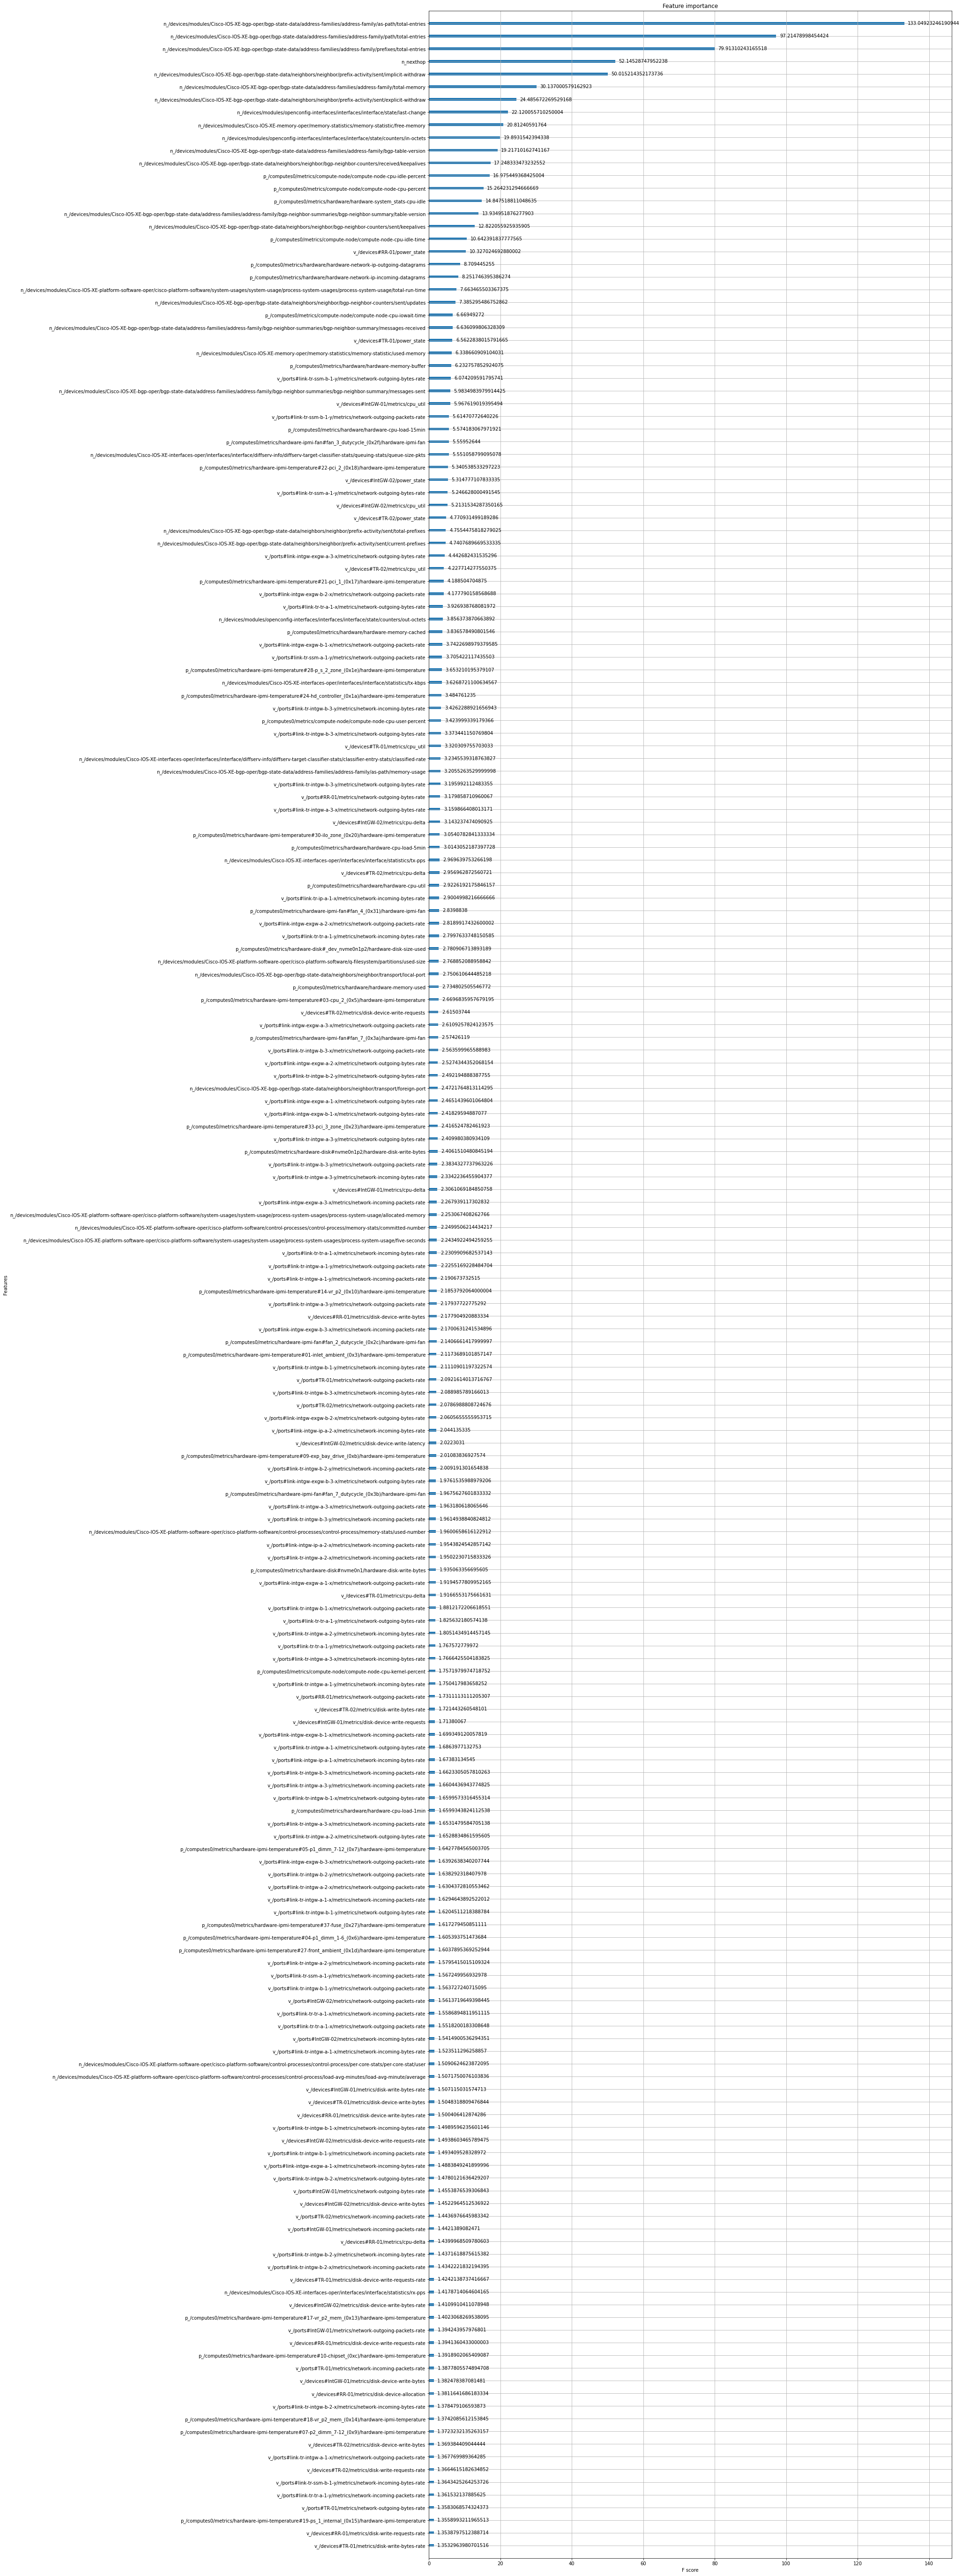

In [98]:
_, ax = plt.subplots(figsize=(20, 100))
plot_importance(model, ax=ax, max_num_features=200, importance_type='gain')
plt.show()

# write result to file

In [ ]:
  # 结果写入文件
im = pd.DataFrame({'importance': model.feature_importances_, 'var': dataset.columns[:-2]})
im = im.sort_values(by='importance', ascending=False)
im.to_csv("feature_important_data_XG.csv")

In [99]:
thresholds = sort(model.feature_importances_)[-100:]
print(thresholds)

[0.00181297 0.00184181 0.00184634 0.00185669 0.00186203 0.00186461
 0.00187692 0.00190851 0.00193177 0.0019725  0.0019913  0.00199447
 0.00199989 0.00200135 0.00204012 0.00204594 0.00206251 0.00209167
 0.0021216  0.00213043 0.00216077 0.00216417 0.0022094  0.00226329
 0.00227637 0.00229147 0.00230144 0.00231705 0.00233296 0.00235025
 0.00240042 0.00241872 0.00244715 0.00245764 0.0024946  0.00252752
 0.0026013  0.00261507 0.00263161 0.00264496 0.00265285 0.00267688
 0.00274785 0.00279182 0.00283366 0.0028355  0.00288395 0.00300155
 0.00302335 0.00306656 0.00309706 0.0031751  0.00319149 0.00324989
 0.00345749 0.00346635 0.0034988  0.00367671 0.0039234  0.00393555
 0.00394836 0.00431434 0.00434204 0.00439844 0.00441976 0.00459399
 0.004601   0.00461312 0.00464666 0.00493873 0.00495187 0.00502694
 0.00515815 0.0052458  0.00543086 0.00549195 0.00551959 0.00611198
 0.00634219 0.00682904 0.00720783 0.00854652 0.00880751 0.01061137
 0.01153239 0.01228762 0.01263249 0.01404867 0.01427451 0.0159

In [100]:
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.4f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy * 100.0))

Thresh=0.0018, n=100, Accuracy: 22.23%
Thresh=0.0018, n=99, Accuracy: 22.13%
Thresh=0.0018, n=98, Accuracy: 22.02%
Thresh=0.0019, n=97, Accuracy: 22.03%
Thresh=0.0019, n=96, Accuracy: 22.03%
Thresh=0.0019, n=95, Accuracy: 21.98%
Thresh=0.0019, n=94, Accuracy: 22.16%
Thresh=0.0019, n=93, Accuracy: 22.13%
Thresh=0.0019, n=92, Accuracy: 22.22%
Thresh=0.0020, n=91, Accuracy: 22.13%
Thresh=0.0020, n=90, Accuracy: 22.26%
Thresh=0.0020, n=89, Accuracy: 22.19%
Thresh=0.0020, n=88, Accuracy: 22.18%
Thresh=0.0020, n=87, Accuracy: 21.98%
Thresh=0.0020, n=86, Accuracy: 22.13%
Thresh=0.0020, n=85, Accuracy: 22.03%
Thresh=0.0021, n=84, Accuracy: 22.10%
Thresh=0.0021, n=83, Accuracy: 22.24%
Thresh=0.0021, n=82, Accuracy: 22.01%
Thresh=0.0021, n=81, Accuracy: 21.88%
Thresh=0.0022, n=80, Accuracy: 21.90%
Thresh=0.0022, n=79, Accuracy: 22.09%
Thresh=0.0022, n=78, Accuracy: 21.89%
Thresh=0.0023, n=77, Accuracy: 22.01%
Thresh=0.0023, n=76, Accuracy: 21.75%
Thresh=0.0023, n=75, Accuracy: 21.86%
Thresh=0.00

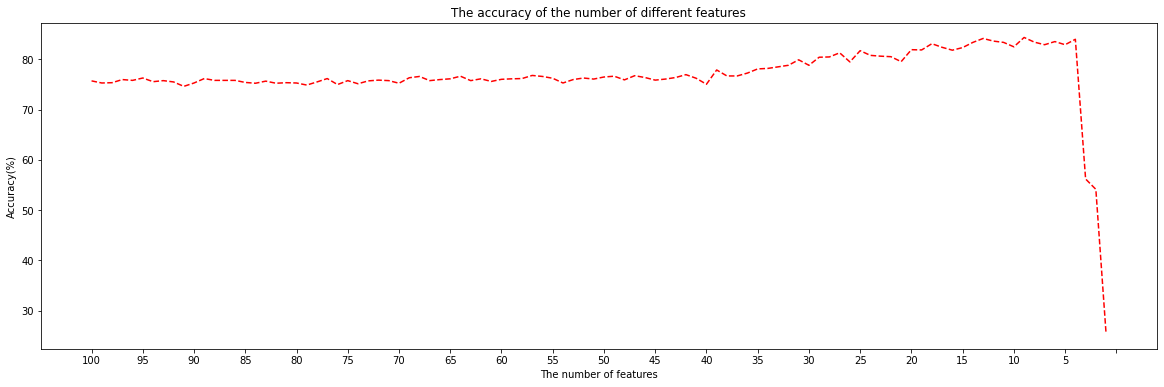

In [59]:
# 用X_train的结果
x_n = [str(100-x) for x in range(100)]
y_acc = [75.70, 75.28, 75.34, 75.96, 75.80, 76.27, 75.54, 75.75, 75.49, 74.61, 75.28, 76.16, 75.80, 75.80, 75.80, 75.39, 75.23, 75.65, 75.23, 75.34, 75.28, 74.87, 75.49, 76.16, 74.97, 75.75, 75.13, 75.70, 75.85, 75.75, 75.23, 76.32, 76.58, 75.75, 75.96, 76.11, 76.63, 75.75, 76.11, 75.59, 76.01, 76.11, 76.16, 76.78, 76.58, 76.22, 75.28, 75.96, 76.27, 76.06, 76.47, 76.63, 75.90, 76.73, 76.37, 75.85, 76.06, 76.37, 76.94, 76.22, 75.03, 77.87, 76.68, 76.68, 77.25, 78.08, 78.18, 78.49, 78.80, 79.89, 78.80, 80.40, 80.46, 81.28, 79.47, 81.70, 80.77, 80.61, 80.51, 79.52, 81.90, 81.85, 83.09, 82.37, 81.80, 82.32, 83.35, 84.13, 83.61, 83.35, 82.47, 84.33, 83.40, 82.89, 83.51, 82.89, 83.97, 56.20, 54.14, 25.39]
plt.figure(figsize=(20, 6))
plt.plot(x_n,y_acc,'r--',label='xgboost')
plt.title('The accuracy of the number of different features')
plt.xlabel('The number of features')
plt.ylabel('Accuracy(%)')
plt.xticks(np.arange(100,-5,-5))
plt.show()